# Practice Session 09: Forecasting


Author: <font color="blue">Nil Tomàs Plans</font>

E-mail: <font color="blue">nil.tomas01estudiant.upf.edu</font>

Date: <font color="blue">24/11/2024</font>

In [1]:
import io
import json
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import math

# 1. Dataset

In [2]:
# LEAVE AS-IS

INPUT_FILE = "aemet-barcelona-airport-2016-2024.json"
weather = pd.read_json(INPUT_FILE)

weather.head(5)

,fecha,indicativo,nombre,provincia,altitud,tmed,prec,tmin,horatmin,tmax,...,sol,presMax,horaPresMax,presMin,horaPresMin,hrMedia,hrMax,horaHrMax,hrMin,horaHrMin
0,2016-07-01,0201D,BARCELONA,BARCELONA,6,"24,1","0,0","21,9",03:40,"26,3",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-07-02,0201D,BARCELONA,BARCELONA,6,"24,6","0,0","22,3",04:40,"27,0",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-07-03,0201D,BARCELONA,BARCELONA,6,"23,4","0,0","21,9",11:00,"24,9",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-07-04,0201D,BARCELONA,BARCELONA,6,"23,8","0,0","21,8",04:40,"25,9",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-07-05,0201D,BARCELONA,BARCELONA,6,"25,3","0,0","23,2",00:10,"27,4",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# LEAVE AS-IS

COLUMN_NAMES = {
  "fecha" : "date",
  "indicativo" : "station_num",
  "nombre" : "station_name",
  "provincia" : "station_province",
  "altitud" : "station_altitude",
  "tmed" : "temp_avg",
  "tmin" : "temp_min",
  "tmax" : "temp_max",
  "horatmin" : "time_temp_min",
  "horatmax" : "time_temp_max",
  "prec" : "rainfall",
  "dir" : "windspeed_dir",
  "velmedia" : "windspeed_avg",
  "racha" : "windspeed_gusts",
  "horaracha" : "time_windspeed_gusts",
  "sol" : "sun",
  "presMax" : "pressure_max",
  "horaPresMax" : "time_pressure_max",
  "presMin" : "pressure_min",
  "horaPresMin" : "time_pressure_min"
}

<font size="+1" color="red">Replace this cell with your code to rename column names, and print the first 5 rows of the data</font>

In [4]:
weather.rename(columns=COLUMN_NAMES, inplace=True)
display(weather.head())

,date,station_num,station_name,station_province,station_altitude,temp_avg,rainfall,temp_min,time_temp_min,temp_max,...,sun,pressure_max,time_pressure_max,pressure_min,time_pressure_min,hrMedia,hrMax,horaHrMax,hrMin,horaHrMin
0,2016-07-01,0201D,BARCELONA,BARCELONA,6,"24,1","0,0","21,9",03:40,"26,3",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-07-02,0201D,BARCELONA,BARCELONA,6,"24,6","0,0","22,3",04:40,"27,0",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-07-03,0201D,BARCELONA,BARCELONA,6,"23,4","0,0","21,9",11:00,"24,9",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-07-04,0201D,BARCELONA,BARCELONA,6,"23,8","0,0","21,8",04:40,"25,9",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-07-05,0201D,BARCELONA,BARCELONA,6,"25,3","0,0","23,2",00:10,"27,4",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<font size="+1" color="red">Replace this cell with your code to drop the station_num, station_name, station_province, station_altitude, and time_* columns, which we will not use, and print the first 10 rows of the data</font>

In [5]:
drop_cols=['station_num','station_name','station_province','station_altitude','time_pressure_max','time_pressure_min','time_temp_min', 'time_temp_max','time_windspeed_gusts']

weather.drop(columns=drop_cols,axis=1,inplace=True)
display(weather.head())

,date,temp_avg,rainfall,temp_min,temp_max,windspeed_dir,windspeed_avg,windspeed_gusts,sun,pressure_max,pressure_min,hrMedia,hrMax,horaHrMax,hrMin,horaHrMin
0,2016-07-01,"24,1","0,0","21,9","26,3",99.0,"3,1","5,8",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-07-02,"24,6","0,0","22,3","27,0",13.0,"3,6","7,5",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-07-03,"23,4","0,0","21,9","24,9",20.0,"4,2","8,9",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-07-04,"23,8","0,0","21,8","25,9",25.0,"3,3","6,7",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-07-05,"25,3","0,0","23,2","27,4",35.0,"3,1","6,4",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<font size="+1" color="red">Replace this cell with your code implementing *str_commas_to_float*.</font>

In [6]:

def str_commas_to_float(x):
    #first I think we should check whether x is a value inside '' or a number
    
    if isinstance(x,str):#if it's a value inside ''
        
        if(x.isdigit()):#if the it's an integer num, then we return the value with a .0
            return float(x)
        
        elif ','in x:#if it's a number with a , saying that is decimal we swap the , for a . and transform it to a float
            x_mod=x.replace(',','.')
            return float(x_mod)
    
        elif x=='Ip': #if Ip
            return 0.0

        else:#everything else is a NaN value
            return np.nan

    elif isinstance(x,(float, int)): #if it's a number we return the floating number
        return float(x)
    
    else:#just in case
        return np.nan
    
    


<font size="+1" color="red">Replace this cell with your code testing *str_commas_to_float*.</font>

In [7]:

assert np.isnan(str_commas_to_float("Varias"))  # NaN
assert np.isnan(str_commas_to_float("06:30"))  # NaN

assert str_commas_to_float("0,0") == 0.0  # 0.0
assert str_commas_to_float("Ip") == 0.0  # 0.0
assert str_commas_to_float("13,5") == 13.5  # 13.5
assert str_commas_to_float("13") == 13.0  # 13.0


print("All test asserts are correct")

All test asserts are correct


<font size="+1" color="red">Replace this cell with your code applying the above function to the specified columns.</font>

In [8]:
columns_to_apply_funct=['temp_min', 'temp_max', 'temp_avg', 'rainfall', 'windspeed_dir',
                        'windspeed_avg', 'windspeed_gusts', 'sun', 'pressure_min', 'pressure_max']
for col in weather.columns:
    if col in columns_to_apply_funct:
        weather[col]=weather[col].apply(str_commas_to_float)
        
display(weather.head())

,date,temp_avg,rainfall,temp_min,temp_max,windspeed_dir,windspeed_avg,windspeed_gusts,sun,pressure_max,pressure_min,hrMedia,hrMax,horaHrMax,hrMin,horaHrMin
0,2016-07-01,24.1,0.0,21.9,26.3,99.0,3.1,5.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-07-02,24.6,0.0,22.3,27.0,13.0,3.6,7.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-07-03,23.4,0.0,21.9,24.9,20.0,4.2,8.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-07-04,23.8,0.0,21.8,25.9,25.0,3.3,6.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-07-05,25.3,0.0,23.2,27.4,35.0,3.1,6.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# LEAVE AS-IS

weather.set_index('date', inplace=True)
weather.index = pd.to_datetime(weather.index)
weather.head(3)

,temp_avg,rainfall,temp_min,temp_max,windspeed_dir,windspeed_avg,windspeed_gusts,sun,pressure_max,pressure_min,hrMedia,hrMax,horaHrMax,hrMin,horaHrMin
date,,,,,,,,,,,,,,,
2016-07-01,24.1,0.0,21.9,26.3,99.0,3.1,5.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-02,24.6,0.0,22.3,27.0,13.0,3.6,7.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-03,23.4,0.0,21.9,24.9,20.0,4.2,8.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# LEAVE AS-IS

# Configure font sizes
plt.rc('font', size=10) 
plt.rc('axes', labelsize=16)
plt.rc('legend', fontsize=16)

In [11]:
# LEAVE AS-IS

# Plot function
def plot(df, column, xlabel='Date', ylabel=''):
    
    # Create a figure
    plt.figure(figsize=(16,5))

    # Plot for dates
    plt.plot_date(df.index, df[column],
                  fmt='.-', color='black')

    # Label axis
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.show()


def plot_min_avg_max(df, min_column='temp_min', avg_column='temp_avg', max_column='temp_max', xlabel='Date', ylabel='Daily temperature [C]'):

    # Create a figure
    plt.figure(figsize=(16,5))

    # Plot for dates
    plt.plot_date(df.index, df[avg_column],
                  fmt='.-', color='black', label='Average')
    plt.fill_between(df.index, df[min_column], df[max_column],
                     color='lightgray')
    plt.legend()

    # Label axis
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.show()

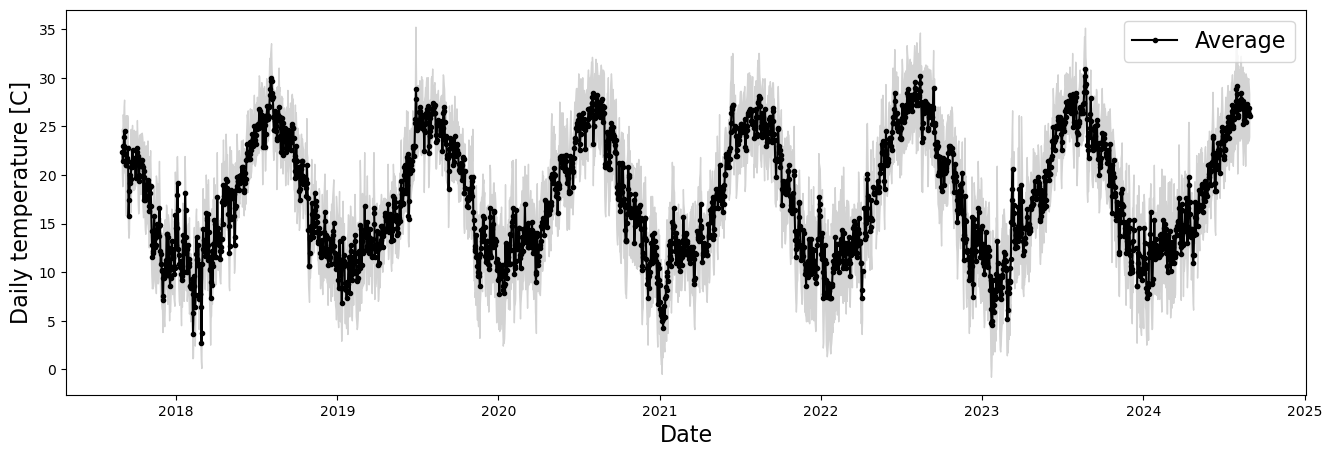

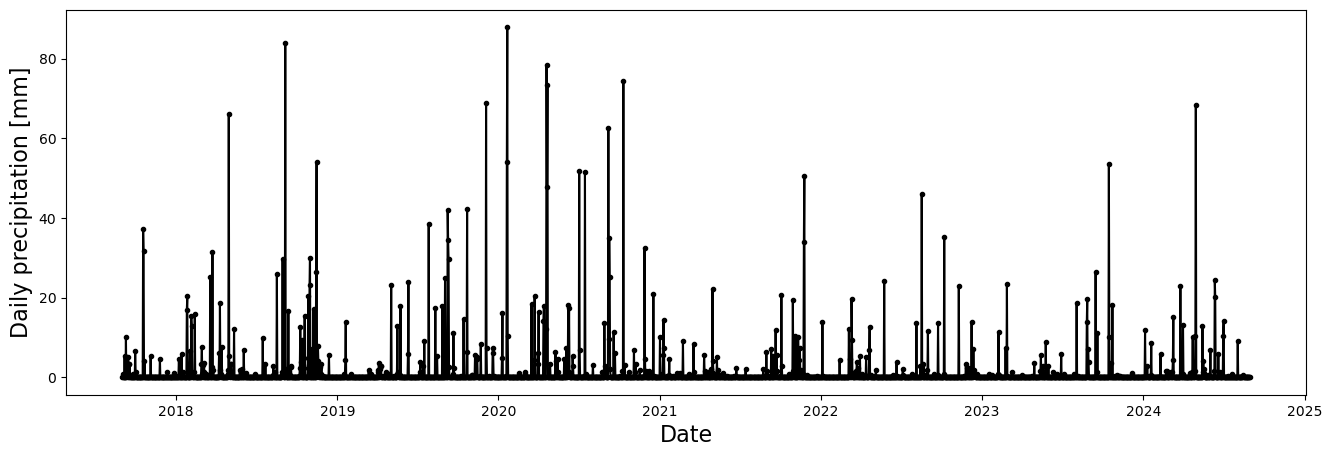

In [12]:
# LEAVE AS-IS

# Retrieve the last 7 years
weather_sample = weather.tail(7*365)

# Plot temperature
plot_min_avg_max(weather_sample)

# Plot precipitation
plot(weather_sample, "rainfall", ylabel="Daily precipitation [mm]")

<font size="+1" color="red">Replace this cell with a brief commentary on these two plots. Answer the following: do you observe seasonality in one of these plots? Can you describe what time of seasonality do you observe?</font>

<font size="+1" color="blue">
   - In my opinion the plot in which we can identify a pattern that represents seasons is the plot of temperatures. In the plot is very easy to identify as **WINTER** those months with lower temperature, **SPRING** the months between the cold periods and the extreme values of temperature (were as the days pass, the temperature increases), **SUMMER** are the period with higher temperatures, and finally **AUTUMN** those months after the extreme temperatures where everyday that goes on, the temperature decreases.
Instead it's quite hard to identify seasons in the precipitation plot, because during 2018 and 2019 there was a lot of rain during the spring and summer, quite the opposite to 2021 or 2022 for example. 
         
 
For the second question the temperatures vary on the different seasons as I explained in the first part.
</font>

# 1. Smooth this series

## 1.1 Smooth the series using moving averages

<font size="+1" color="red">Replace this cell with your implementation of "moving_average"</font>

In [13]:
def moving_average(df, window_size):

    averages = []
    
    for i in range(len(df)):
        
        
        start_at = max(0, i - window_size + 1) ##The window starts at (i - window_size + 1), or 0 if value is negative
        end_at=i+1 # Include the current row
        
        window=df.iloc[start_at:end_at]
        # YOUR CODE HERE
        
        # Compute the average
        average = window.mean(numeric_only=True)
        
        # Append the average to the list of averages
        averages.append(average)

    # Create the dataframe that will be returned
    smoothed = pd.DataFrame(averages, columns=df.columns)
    smoothed.set_index(df.index, inplace=True)
    
    return smoothed

In [14]:
# LEAVE AS-IS

window_size = 7

weather_smoothed = moving_average(weather, window_size)

weather_smoothed.head(10)

,temp_avg,rainfall,temp_min,temp_max,windspeed_dir,windspeed_avg,windspeed_gusts,sun,pressure_max,pressure_min,hrMedia,hrMax,horaHrMax,hrMin,horaHrMin
date,,,,,,,,,,,,,,,
2016-07-01,24.100000,0.000000,21.900000,26.300000,99.000000,3.100000,5.800000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-02,24.350000,0.000000,22.100000,26.650000,56.000000,3.350000,6.650000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-03,24.033333,0.000000,22.033333,26.066667,44.000000,3.633333,7.400000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-04,23.975000,0.000000,21.975000,26.025000,39.250000,3.550000,7.225000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-05,24.240000,0.000000,22.220000,26.300000,38.400000,3.460000,7.060000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-06,24.500000,0.000000,22.366667,26.666667,35.333333,3.716667,7.833333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-07,24.628571,0.000000,22.557143,26.728571,44.428571,3.742857,8.185714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-08,24.928571,0.014286,22.857143,27.028571,33.571429,3.657143,8.871429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-09,25.214286,0.014286,23.214286,27.242857,34.285714,3.585714,8.757143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


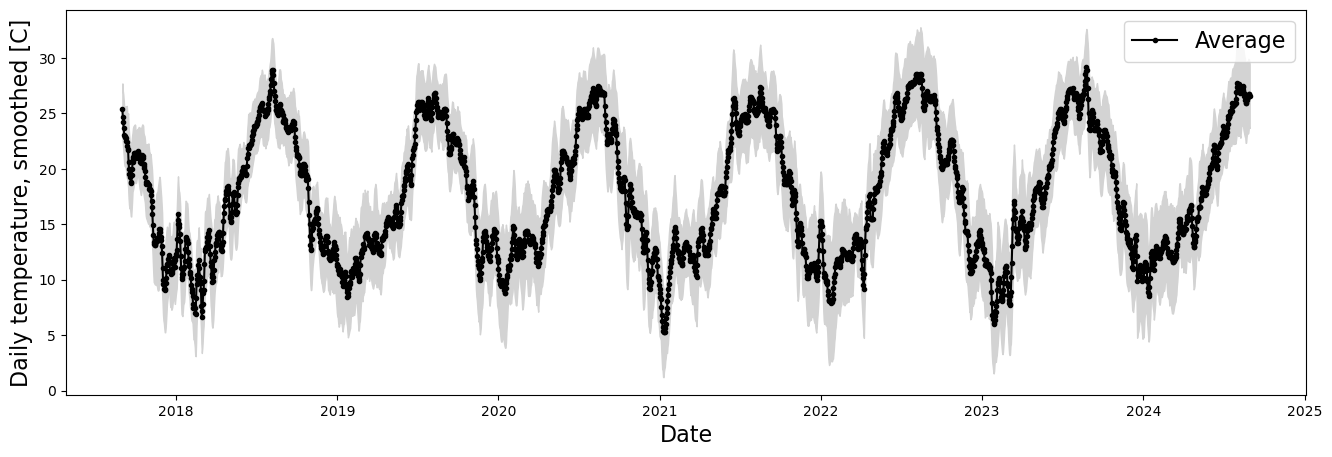

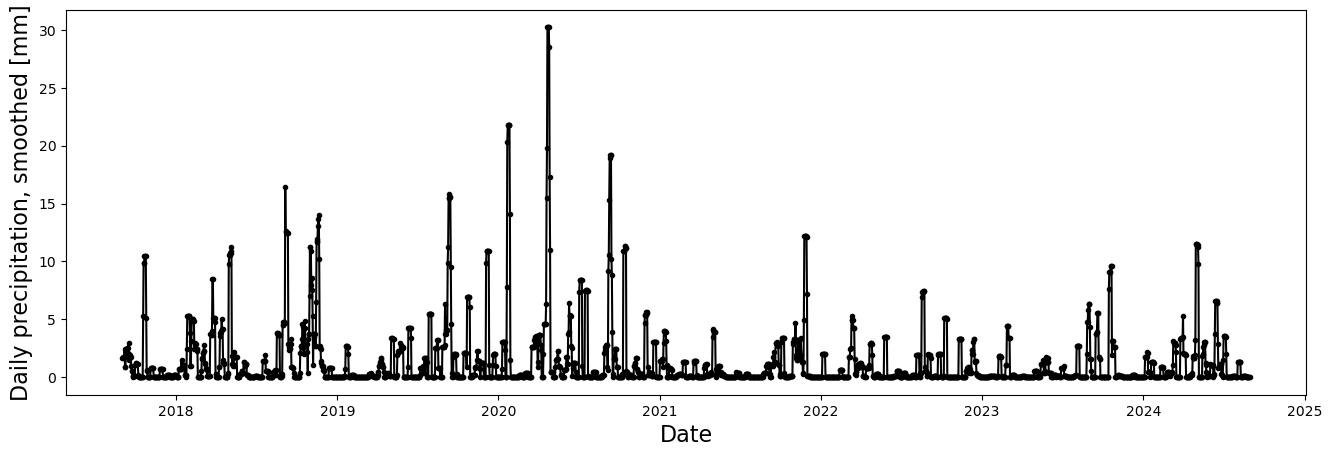

In [15]:
# LEAVE AS-IS

# Sample last 7 years
weather_smoothed_sample = weather_smoothed.tail(7*365)

# Plot smoothed temperature
plot_min_avg_max(weather_smoothed_sample, ylabel='Daily temperature, smoothed [C]')

# Plot smoothed precipitation
plot(weather_smoothed_sample, "rainfall", ylabel="Daily precipitation, smoothed [mm]")

<font size="+1" color="red">Replace this cell with a brief commentary indicating what are the key difficulties when implementing a function for "moving_average"</font>

<font size="+1" color="blue">The first difficulty is the handling of the first and lasts rows of the dataset, because the window range won't have previous and last values (in case of first and last rows). Also we could find an error if there's are Null or NaN values, where the average will result in NaN.   </font>

<font size="+1" color="red">Replace this cell with code that creates a separate ``test`` dataset, and smooths this ``test`` dataset 20 times. **Do not modify your original dataset**, this is just a test. Plot the smoothed daily temperature and smoothed daily precipitation in the ``test`` dataset.</font>

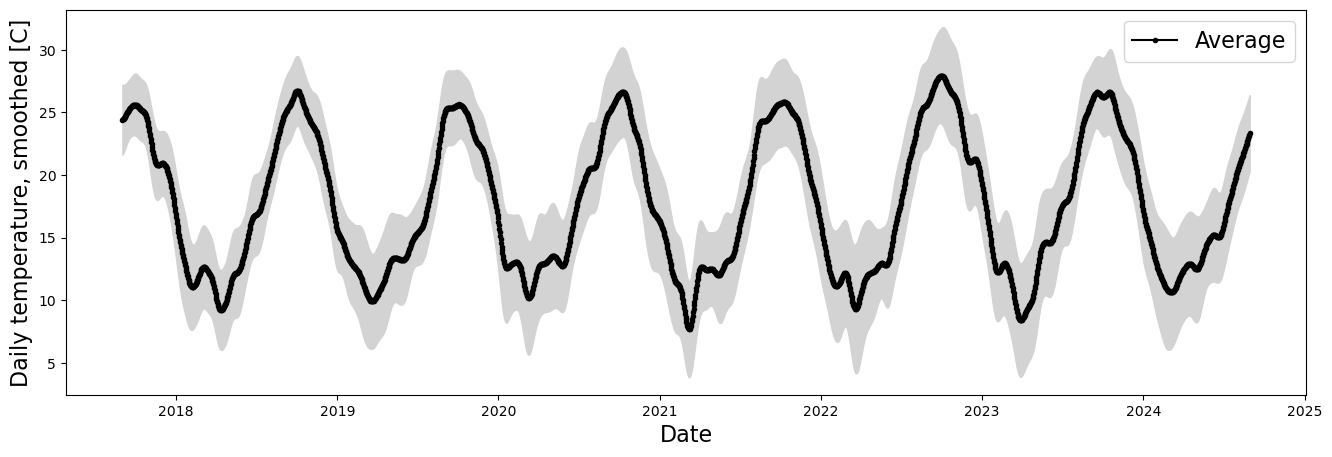

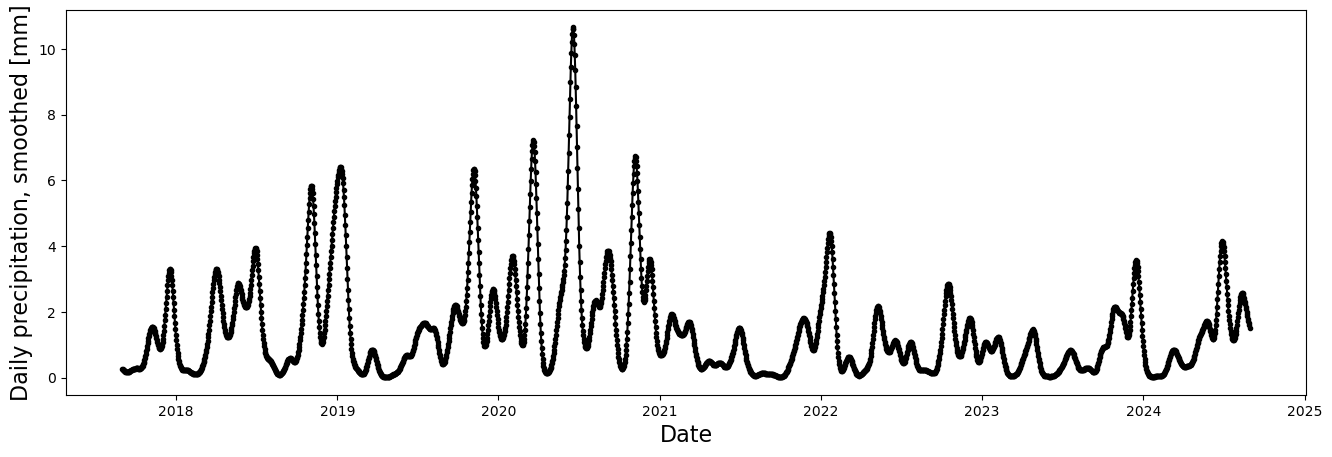

In [16]:
# Create a separate test dataset (copy of the original dataset)
test_dataset = weather.copy()



for i in range(20):
    test_dataset = moving_average(test_dataset, window_size)

# Sample last 7 years
test_smoothed_sample = test_dataset.tail(7 * 365)

# Plot smoothed temperature
plot_min_avg_max(test_smoothed_sample, ylabel='Daily temperature, smoothed [C]')

# Plot smoothed precipitation
plot(test_smoothed_sample, "rainfall", ylabel="Daily precipitation, smoothed [mm]")



<font size="+1" color="red">Replace this cell with a brief commentary on what you see in the repeatedly smoothed dataset. Why does this happen?</font>

<font size="+1" color="blue">As the test_dataset is smoothed 20 times, 
that results in a plot where both curves of temperature and precipitation 
are extremely smoothed and have a window range at every piont (area in grey)</font>

## 1.2. Smooth the series by binning per floating weeks

<font size="+1" color="red">Replace this cell with your code for "list_of_floating_week_starts"</font>

In [17]:
def list_of_floating_week_starts(first, last):
    weeks = []
    
    date=first #The first element should be first
    
    while date<=last:#
        weeks.append(date)
        date+=datetime.timedelta(weeks=1)
    
    # last element should be in the week after last
    if weeks[-1] <= last:
        weeks.append(weeks[-1] + datetime.timedelta(weeks=1))
    return(weeks)

In [18]:
# LEAVE AS-IS

# Remember that our data frame is indexedb by date
first_day = np.min(weather.index)
last_day = np.max(weather.index)

# Obtain the list of weeks
weeks = list_of_floating_week_starts(first_day, last_day)

# Print the list of weeks
print("There are %d week starts" % len(weeks))
print("First week starts %s, last week starts %s" %
      (weeks[0].strftime("%Y-%m-%d"), weeks[-1].strftime("%Y-%m-%d")))

There are 427 week starts
First week starts 2016-07-01, last week starts 2024-08-30


In [19]:
# LEAVE AS-IS

# Create a map from dates to week starts
date_to_week_start= {}
week_num = 0
for date, row in weather.iterrows():
    while not (date >= weeks[week_num] and date < weeks[week_num+1]):
        week_num += 1
    date_to_week_start[date] = weeks[week_num]
    
# Create a new dataframe with an extra column
weather_with_week_start = weather
weather_with_week_start['week_start'] = [date_to_week_start[date] for date in weather.index]
weather_with_week_start.head(10)

,temp_avg,rainfall,temp_min,temp_max,windspeed_dir,windspeed_avg,windspeed_gusts,sun,pressure_max,pressure_min,hrMedia,hrMax,horaHrMax,hrMin,horaHrMin,week_start
date,,,,,,,,,,,,,,,,
2016-07-01,24.1,0.0,21.9,26.3,99.0,3.1,5.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-07-01
2016-07-02,24.6,0.0,22.3,27.0,13.0,3.6,7.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-07-01
2016-07-03,23.4,0.0,21.9,24.9,20.0,4.2,8.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-07-01
2016-07-04,23.8,0.0,21.8,25.9,25.0,3.3,6.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-07-01
2016-07-05,25.3,0.0,23.2,27.4,35.0,3.1,6.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-07-01
2016-07-06,25.8,0.0,23.1,28.5,20.0,5.0,11.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-07-01
2016-07-07,25.4,0.0,23.7,27.1,99.0,3.9,10.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-07-01
2016-07-08,26.2,0.1,24.0,28.4,23.0,2.5,10.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-07-08
2016-07-09,26.6,0.0,24.8,28.5,18.0,3.1,6.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-07-08


<font size="+1" color="red">Replace this cell with your code to generate the "weather_per_floating_week" dataframe</font>

In [20]:
weather_dict= {'temp_min': np.mean, #keys are the column names and values the functions mean and sum respectively
        'temp_avg': np.mean,       
        'temp_max': np.mean,       
        'rainfall': np.sum}


weather_per_floating_week=weather_with_week_start.groupby('week_start').agg(weather_dict).reset_index()


# Display the result
print(weather_per_floating_week.head())

  week_start   temp_min   temp_avg   temp_max  rainfall
0 2016-07-01  22.557143  24.628571  26.728571       0.0
1 2016-07-08  23.128571  25.314286  27.500000       0.4
2 2016-07-15  21.485714  24.171429  26.871429       0.6
3 2016-07-22  22.542857  25.428571  28.328571       5.8
4 2016-07-29  24.028571  25.957143  27.871429       0.6


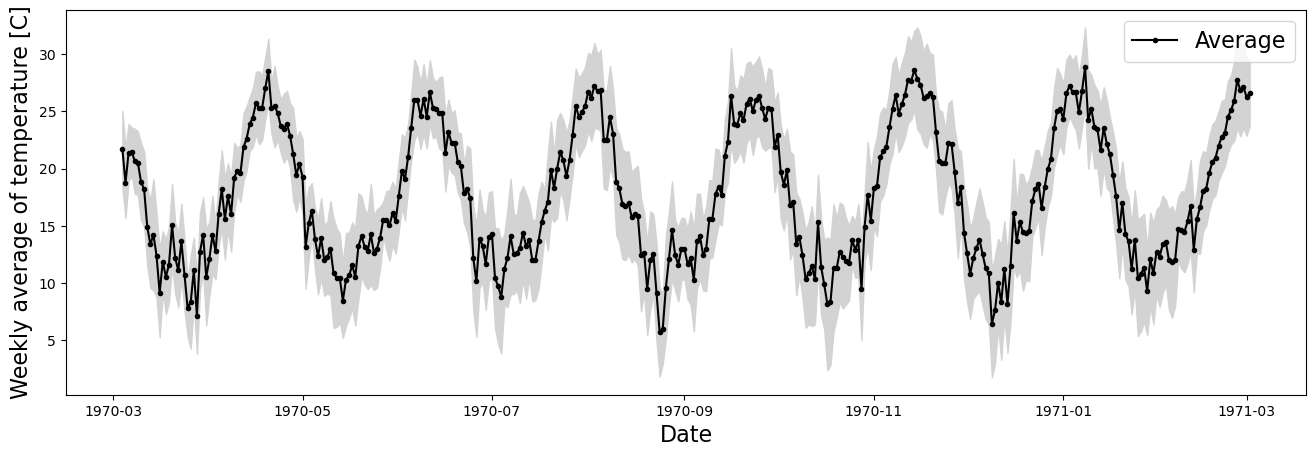

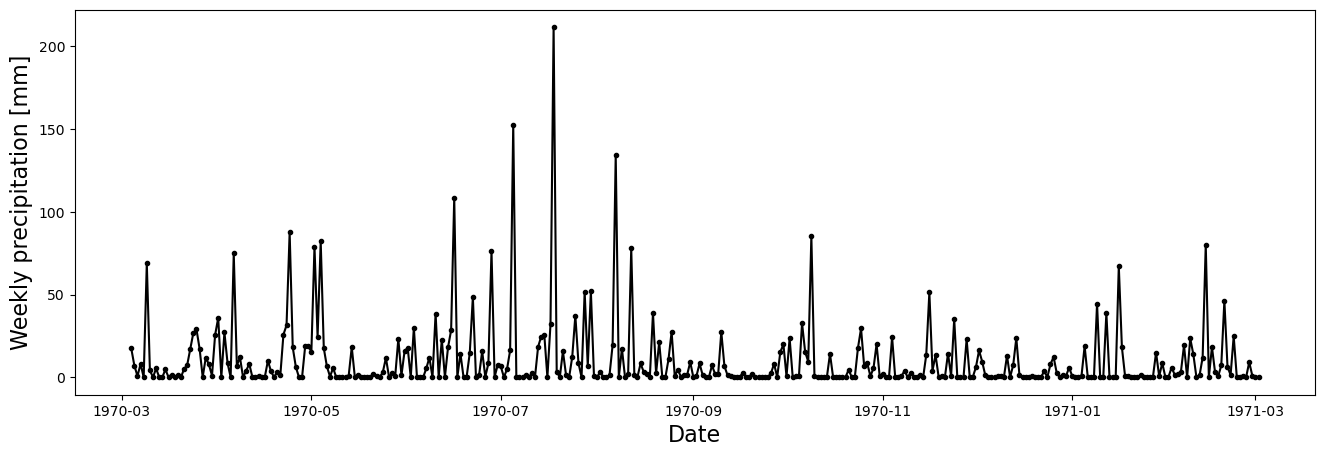

In [21]:
# LEAVE AS-IS

# Retrieve the past 5 years
weather_sample = weather_per_floating_week.tail(7*52)

# Plot temperature
plot_min_avg_max(weather_sample, ylabel="Weekly average of temperature [C]")

# Plot precipitation
plot(weather_sample, "rainfall", ylabel="Weekly precipitation [mm]")

<font size="+1" color="red">Replace this cell with a brief commentary of what you observe on these plots.</font>

<font size="+1" color="blue">The first plot I can observe that the weekly avg temperature follows a cycle with high temperatures during summer weeks and low temperature during winter ones, with a range of variation in grey area. Concerning the second plot, we observe a high precipitation during spring weeks, and specially we can highlight a peak of precipitation between 1970-07 and 1970-09. If we had plotted more decades, we could try to find also a cycle with a long period that these strong rains could repeat. Maybe it could be related somehow with the DANA of this October.  </font>

## 1.3. Smooth the series by binning per month

In [22]:
def list_of_month_starts(first, last):
    months = []
    
    date = first.replace(day=1)
    
    # Iterate until  last date
    while date <= last:
        months.append(date)
        
        if date.month < 12:
            date = date.replace(month=date.month + 1)
        else:

            date = date.replace(year=date.year + 1, month=1)
    

    months.append(date)
    
    return months



In [23]:
# LEAVE AS-IS

first_day = np.min(weather.index)
last_day = np.max(weather.index)
months = list_of_month_starts(first_day, last_day)

print("There are %d month starts" % len(months))
print("First month starts %s, last month starts %s" % (months[0].strftime("%Y-%m-%d"), months[-1].strftime("%Y-%m-%d")))

There are 99 month starts
First month starts 2016-07-01, last month starts 2024-09-01


In [24]:
# LEAVE AS-IS

# Create a map from dates to week starts
date_to_month_start= {}
month_num = 0
for date, row in weather.iterrows():
    while not (date >= months[month_num] and date < months[month_num+1]):
        month_num += 1
    date_to_month_start[date] = months[month_num]
    
# Create a new dataframe with an extra column
weather_with_month_start = weather
weather_with_month_start['month_start'] = [date_to_month_start[date] for date in weather.index]
weather_with_month_start

,temp_avg,rainfall,temp_min,temp_max,windspeed_dir,windspeed_avg,windspeed_gusts,sun,pressure_max,pressure_min,hrMedia,hrMax,horaHrMax,hrMin,horaHrMin,week_start,month_start
date,,,,,,,,,,,,,,,,,
2016-07-01,24.1,0.0,21.9,26.3,99.0,3.1,5.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-07-01,2016-07-01
2016-07-02,24.6,0.0,22.3,27.0,13.0,3.6,7.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-07-01,2016-07-01
2016-07-03,23.4,0.0,21.9,24.9,20.0,4.2,8.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-07-01,2016-07-01
2016-07-04,23.8,0.0,21.8,25.9,25.0,3.3,6.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-07-01,2016-07-01
2016-07-05,25.3,0.0,23.2,27.4,35.0,3.1,6.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-07-01,2016-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-25,26.6,0.0,23.9,29.3,10.0,4.2,12.5,8.8,1017.7,1015.4,55.0,82.0,Varias,46.0,14:13,2024-08-23,2024-08-01
2024-08-26,26.5,0.0,23.3,29.7,99.0,5.0,10.3,8.1,1017.4,1014.8,63.0,78.0,Varias,52.0,11:36,2024-08-23,2024-08-01
2024-08-27,26.9,0.0,23.9,29.9,22.0,4.4,11.7,10.3,1015.9,1012.6,69.0,81.0,Varias,58.0,14:39,2024-08-23,2024-08-01


<font size="+1" color="red">Replace this cell with your code to generate the "weather_per_month" dataframe</font>

In [25]:
weather_dict= {'temp_min': np.mean, #keys are the column names and values the functions mean and sum respectively
        'temp_avg': np.mean,       
        'temp_max': np.mean,       
        'rainfall': np.sum}


weather_per_month=weather_with_month_start.groupby('month_start').agg(weather_dict).reset_index()

# Display the result
print(weather_per_month.head())

  month_start   temp_min   temp_avg   temp_max  rainfall
0  2016-07-01  22.593548  24.996774  27.412903       7.4
1  2016-08-01  22.633333  24.974074  27.318519       8.1
2  2016-09-01  20.758621  23.703448  26.655172      31.6
3  2016-10-01  16.903448  19.365517  21.837931     126.7
4  2016-11-01  11.937931  15.027586  18.100000      31.8


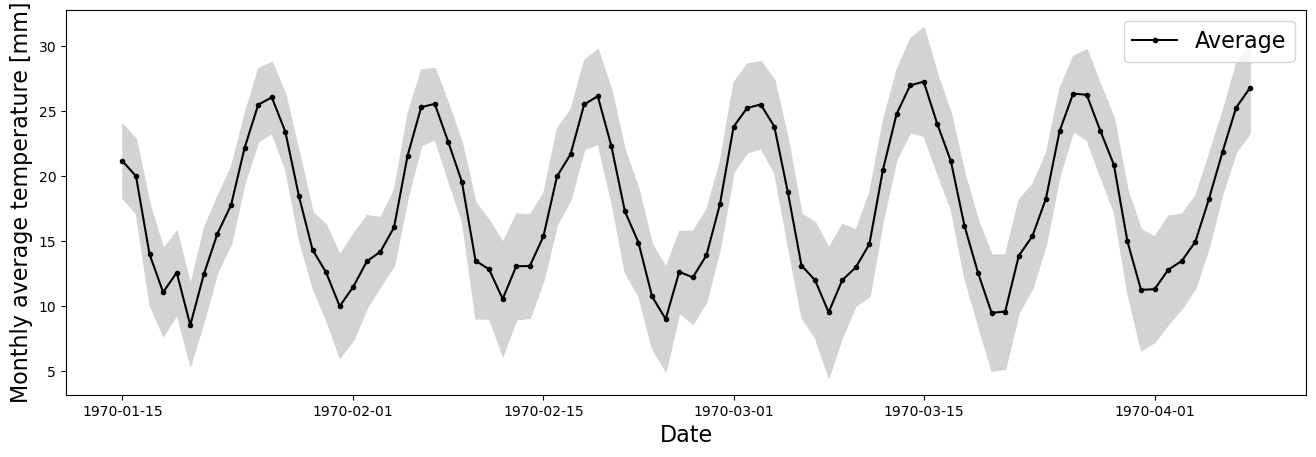

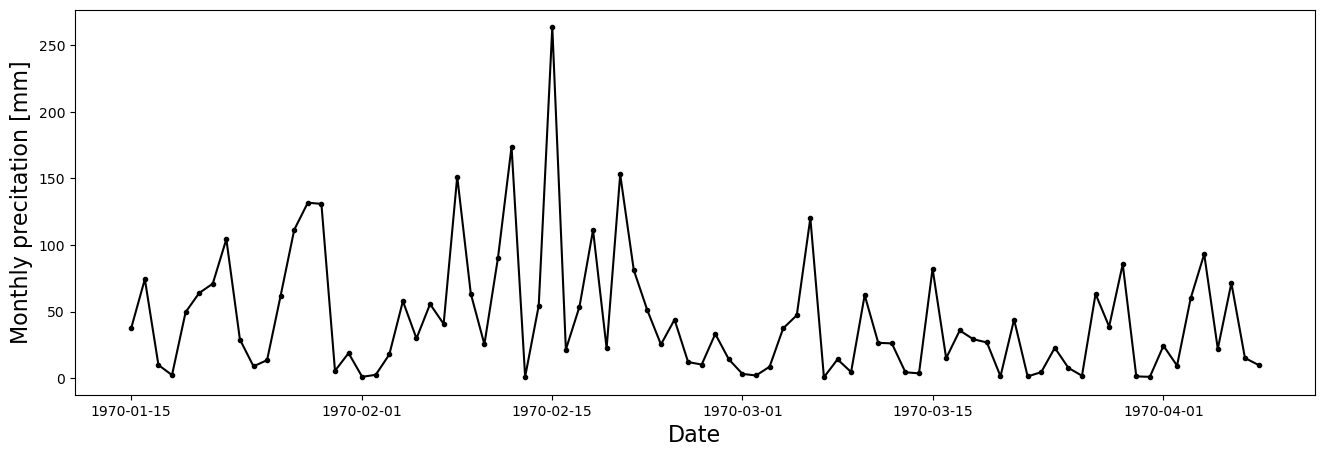

In [26]:
# LEAVE AS-IS

# Retrieve the last 7 years
weather_sample = weather_per_month.tail(7*12)

# Plot temperature
plot_min_avg_max(weather_sample, ylabel="Monthly average temperature [mm]")

# Plot precipitation
plot(weather_sample, "rainfall", ylabel="Monthly precitation [mm]")

<font size="+1" color="red">Replace this cell with a brief commentary of what you observe on these plots.</font>

<font size="+1" color="blue">I observe two plots of the monthly average temperature and monthly average precipitation.
In the first plot the function is smoothed the opposite of the second one. For the first one, I observe that the maximum
of temperatures are achieved during months of summer whereas in the precipitation months (sencond plot) are during spring monhts.
Also the points of data on the precipitation plot are linked.</font>

# 2. Perform forecasting

## 2.1. Compute auto-correlation plots

<font size="+1" color="red">Replace this cell with your code for "lagged_series"</font>

In [27]:
def lagged_series(series, lag):
    original_trimmed = []
    lagged = []
    for i in range(len(series)):
        j = i - lag
        
        # YOUR CODE HERE
        # You have to append series[i] to original and series[j] to lagged
        # but only if j is in [0, len(series)-1]
        if j >= 0:
            original_trimmed.append(series[i])
            lagged.append(series[j])
    return original_trimmed, lagged

In [28]:
# LEAVE AS-IS

assert ([44, 55, 66, 77, 88], [11, 22, 33, 44, 55]) == lagged_series([11,22,33,44,55,66,77,88], 3)

assert ([33, 44, 55, 66, 77, 88], [11, 22, 33, 44, 55, 66]) == lagged_series([11,22,33,44,55,66,77,88], 2)

assert ([22, 33, 44, 55, 66, 77, 88], [11, 22, 33, 44, 55, 66, 77]) == lagged_series([11,22,33,44,55,66,77,88], 1)


In [29]:
# LEAVE AS-IS

# Computes the correlation between two vectors, considering
# only the positions in which both vectors are not NaN
def correlation_without_nan(x,y):
    positions_to_remove = ~np.logical_or(np.isnan(x), np.isnan(y))

    x_without_nan = np.compress(positions_to_remove, x)
    y_without_nan = np.compress(positions_to_remove, y)
    return stats.pearsonr(x_without_nan,y_without_nan)[0]  

# Compute autocorrelation
def autocorrelation(series, lag):
    x,y = lagged_series(series, lag)
            
    return correlation_without_nan(x,y)

<font size="+1" color="red">Replace this cell with your code to compute "auto_correlations_temp" and "auto_correlations_rainfall"</font>

In [30]:
def compute_autocorrelations(series, max_periods):
    autocorrelations = []
    
    for lag in range(max_periods):
        corr = autocorrelation(series, lag)
        autocorrelations.append(corr)
        
    return autocorrelations


In [31]:
max_periods=2*365

auto_correlations_temp=compute_autocorrelations(weather['temp_avg'], max_periods)
auto_correlations_temp_max=compute_autocorrelations(weather['temp_max'], max_periods)
auto_correlations_rainfall=compute_autocorrelations(weather['rainfall'], max_periods)

In [32]:
# LEAVE AS-IS

def plot_auto_correlations(correlations, xlabel="Lag (days)", ylabel="Autocorrelation"):
    # Figure
    plt.figure(figsize=(15,4))

    # Plot correlation
    plt.plot(range(len(correlations)), correlations, '-o')

    # Add xticks every 10 periods
    plt.xticks(np.arange(0, len(correlations), 10), rotation=90)

    # Add a horizontal line at zero
    plt.hlines(0, xmin=0, xmax=len(correlations))

    # Add labels
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.show()

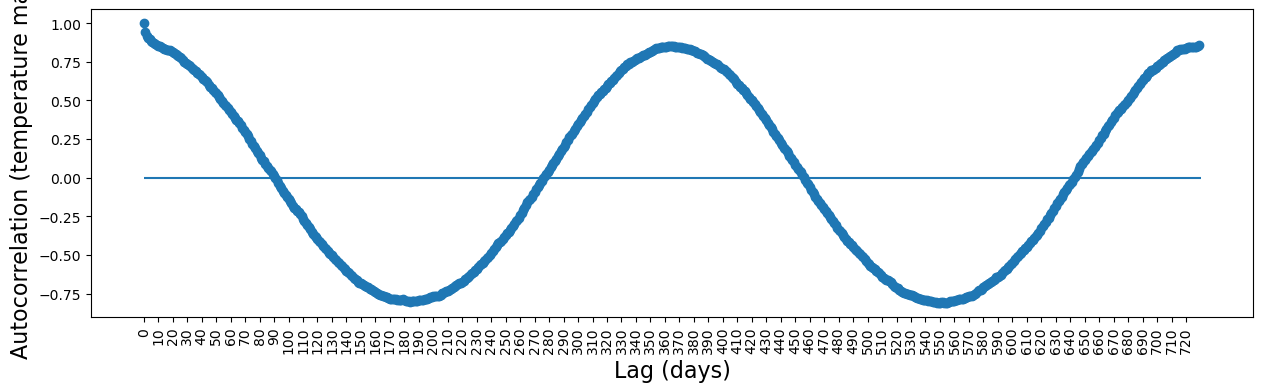

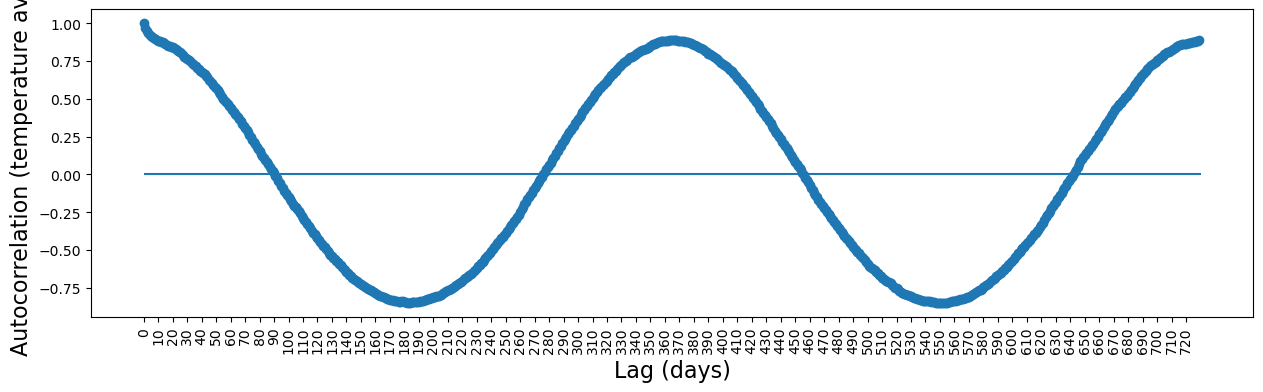

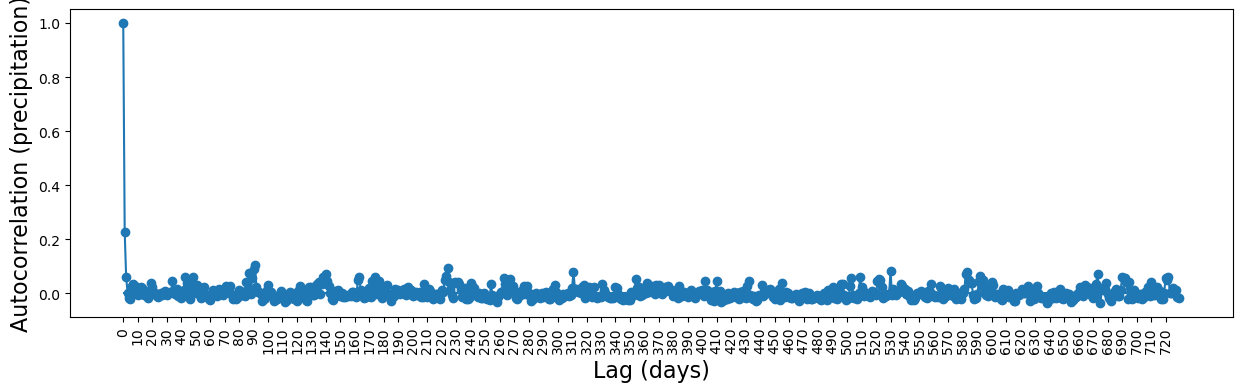

In [36]:
# LEAVE AS-IS

# Plot max temperature auto-correlation
plot_auto_correlations(auto_correlations_temp_max, ylabel="Autocorrelation (temperature max)")

# Plot avg temperature auto-correlation
plot_auto_correlations(auto_correlations_temp, ylabel="Autocorrelation (temperature avg)")

# Plot precipitation auto-correlation
plot_auto_correlations(auto_correlations_rainfall, ylabel="Autocorrelation (precipitation)")

<font size="+1" color="red">Replace this cell with a brief commentary on what you see on these plots. What do these autocorrelations indicate about the temperature data? What do these autocorrelations indicate about the precipitation data?</font>

<font size="+1" color="blue">For the first plot we can observe a sinusoidal function that represents the autocorrelation between the temperature max and days. The period of the sinusoid is 1 year approx. 
That means that when the temperature is higher is during summer days, approxiamtely the same as the following year. For the second plot, the sinusoid is very similar because we are also computing the temperature. I believe it would be different if we were plotting the min temperature where we would have a shift ofapproximately 1/4 year and it would havfe it's peak (at 1) in winter. 
For the last plot on autocorrelation between precipitation and days, I do not observe  significant variance of the values. It is true that there are days like DAY 90 where there's a little peak, but it doesnt really repeat itself. 
In conclusion in the first two plots show a correlation between max temperatures and avg temperatures over the days. Instead, the precipitation it is not very clear, and it is always more or less constant</font>

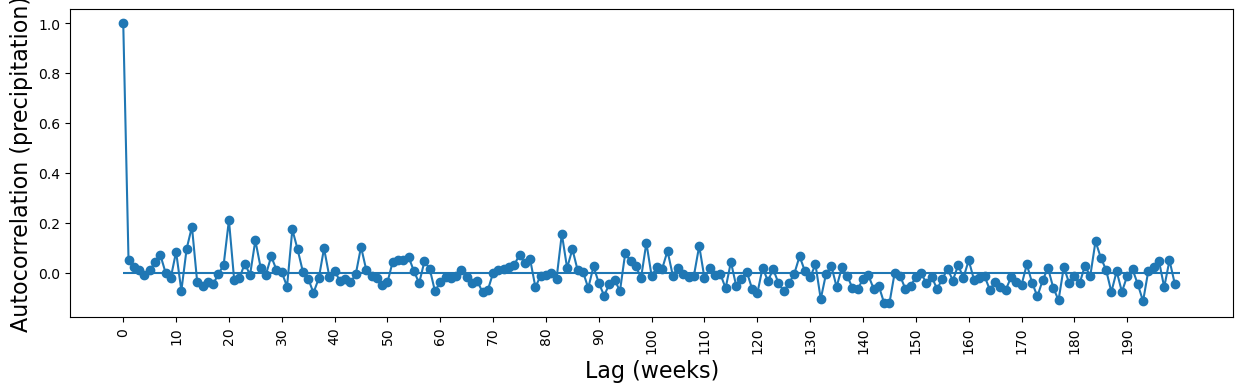

In [37]:
# LEAVE AS-IS

auto_correlations_rainfall_week = compute_autocorrelations(weather_per_floating_week['rainfall'], 200)

plot_auto_correlations(auto_correlations_rainfall_week, xlabel='Lag (weeks)', ylabel="Autocorrelation (precipitation)")

<font size="+1" color="red">Replace this cell with a brief commentary on what you see on this plot. Do you think the correlations you observe in the weekly time series of precipitation (aside from the one at lag=1) come from a real phenomenon, or are spurious? Why?</font>

<font size="+1" color="blue">In my opinion they seem real because if we take into consideration that a year has 52 weeks approx. them we can observe that during the first 20 weeks (corresponding to the first 5 months of the year) there's a higher correlation of precipitation corresponding to winter and spring. THe same happens withe the last weeks of the year with autumn season. Additionally, during the third year represented we can observe a period of drought that seems quite real as the clima we have been having in the last years here in Catalonia.</font>

## 2.2. Prepare a system of equations to learn an auto-regressive model

<font size="+1" color="red">Replace this cell with your code for "prepare_matrices"</font>

In [38]:
def prepare_matrices(series, lags):
    y = []
    X = []
    
    for lag in lags:
        assert(lag > 0)
        assert(lag < len(series))
    
    for i in range(np.max(lags), len(series)):
        
        row = []
        
        # Fill the row with the lagged values
        for lag in lags:
            row.append(series[i - lag])
        if not any(np.isnan(row)) and not np.isnan(series[i]):   
            X.append(row)
            y.append(series[i])
        
    return X, y


In [39]:
# LEAVE AS-IS

X, y = prepare_matrices([11, 15, 32, 37, 52, 54, 70, 89], [2, 3])
print("X=%s" % X)
print("y=%s" % y)

X=[[15, 11], [32, 15], [37, 32], [52, 37], [54, 52]]
y=[37, 52, 54, 70, 89]


In [40]:
# LEAVE AS-IS

X, y = prepare_matrices([11, 15, 32, np.nan, 52, 54, 70, 89], [2, 3])
print("X=%s" % X)
print("y=%s" % y)

X=[[32, 15], [54, 52]]
y=[52, 89]


## 2.3. Perform forecasts

In [41]:
# LEAVE AS-IS

def perform_forecast(series, lags):

    # Prepare matrices for linear regression
    X, y = prepare_matrices(series, lags)

    # Perform forecast
    linear_regressor = LinearRegression()
    linear_regressor.fit(X,y)
    y_pred = linear_regressor.predict(X)

    # Compute forecasting error
    # Root mean squared error, normalized
    rmse = math.sqrt(mean_squared_error(y, y_pred))/(np.max(y)-np.min(y))
    
    # Return: observed, predicted, error
    return (y, y_pred, rmse)

def plot_forecast(y, y_pred, xlabel="Period", ylabel="", nrmsd=-1):

    plt.figure(figsize=(15,4))
    
    plt.plot(y, '.-', linewidth=4, color='gray', label='Observed')
    plt.plot(y_pred, '--', linewidth=2, color='green', label=('Model (NRMSD=%.2f)' % nrmsd if nrmsd > 0 else 'Model'))
    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.legend()
    plt.show()

<font size="+1" color="red">Replace this cell with your choice for "lags_monthly_temperature"</font>

In [42]:
lags_monthly_temperature=[15,25,35,16]

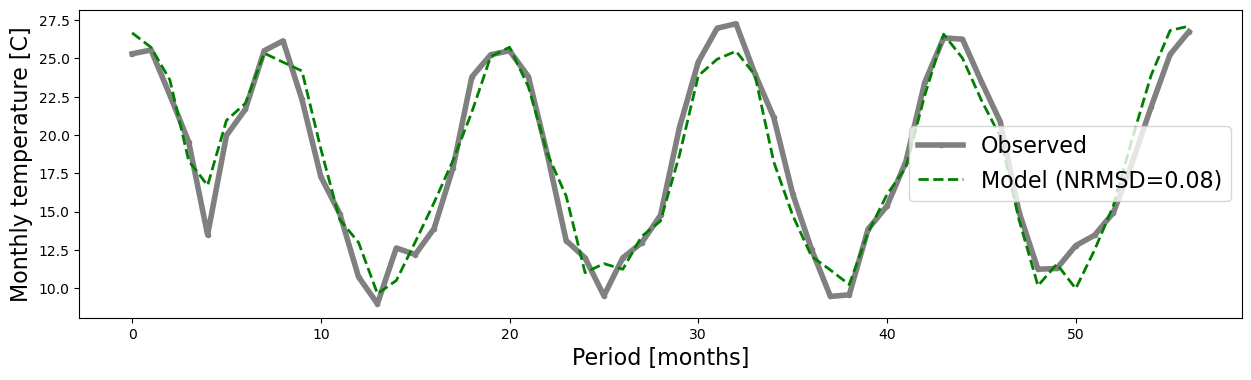

In [43]:
# LEAVE AS-IS

(y, y_pred, nrmsd) = perform_forecast(weather_per_month['temp_avg'],
                                      lags_monthly_temperature)

plot_forecast(y, y_pred,
              xlabel="Period [months]",
              ylabel="Monthly temperature [C]",
              nrmsd=nrmsd)

<font size="+1" color="red">Replace this cell with code and plots predicting: (1) weekly temperature, (2) daily temperature. Always use up to 4 lags, and try to find the lags leading to the smaller error.</font>

In [44]:
lags_weekly_temperature = [1, 2, 4, 4]
lags_daily_temperature = [1, 2, 3, 7]


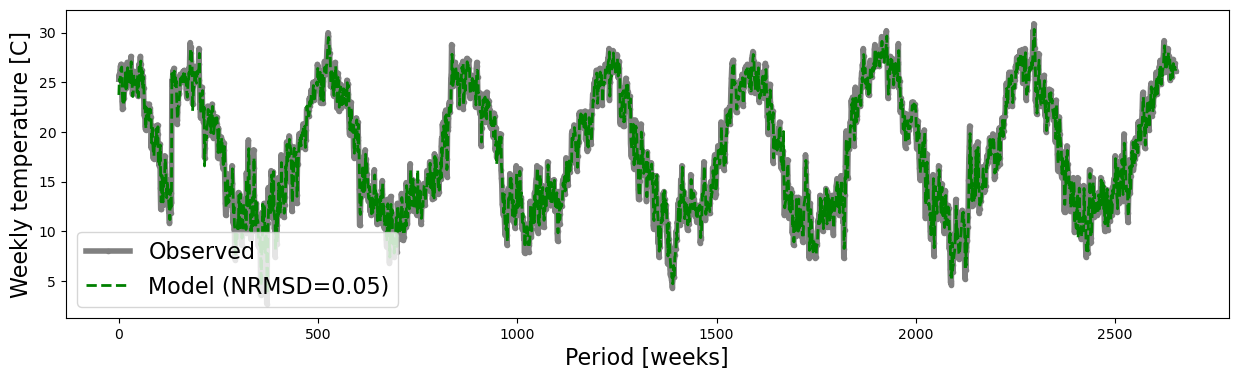

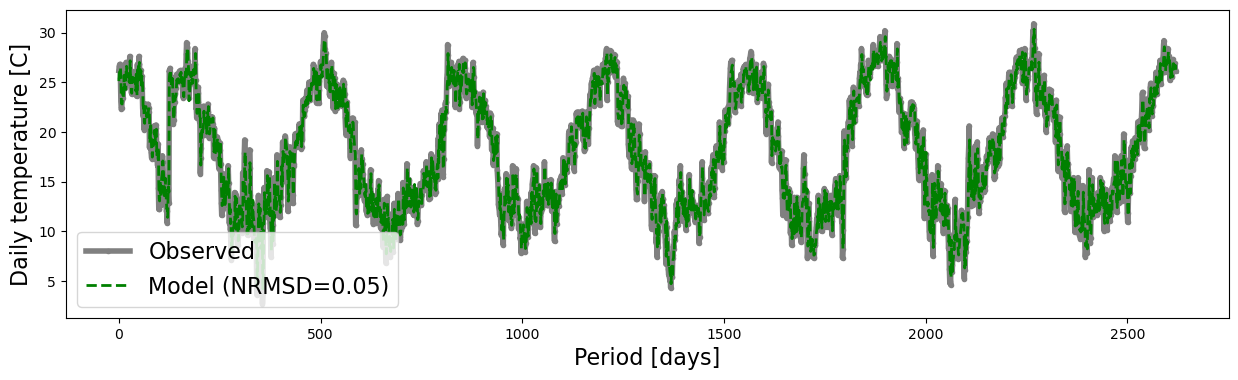

In [45]:
#1) Weekly temperature prediction
(y_w, y_pred_w, nrmsd_w) = perform_forecast(weather['temp_avg'],
                                    lags_weekly_temperature)


plot_forecast(y_w, y_pred_w,
              xlabel="Period [weeks]",
              ylabel="Weekly temperature [C]",
              nrmsd=nrmsd_w)
 

# 2) Daily temperature prediction
(y_d, y_pred_d, nrmsd_d) = perform_forecast(weather['temp_avg'],
                                    lags_daily_temperature)
plot_forecast(y_d, y_pred_d,
              xlabel="Period [days]",
              ylabel="Daily temperature [C]",
              nrmsd=nrmsd_d)


<font size="+1" color="red">Replace this cell with a brief commentary on what you observe when predicting temperature.</font>

<font size="+1" color="blue">I can observe that the model NRMSD is capturing the overall sinusoid of temperatures, because the model follows de observed data. That happens in both plots.</font>

<font size="+1" color="red">Replace this cell with code and plots predicting: (1) monthly rainfall, (2) weekly rainfall, (3) daily rainfall.  Always use up to 4 lags, and try to find the lags leading to the smaller error.</font>

In [46]:
lags_monthly_rainfall = [1,2,3, 4]
lags_weekly_rainfall  = [1,2,3, 4]
lags_daily_rainfall = [1,2,4 ,6]

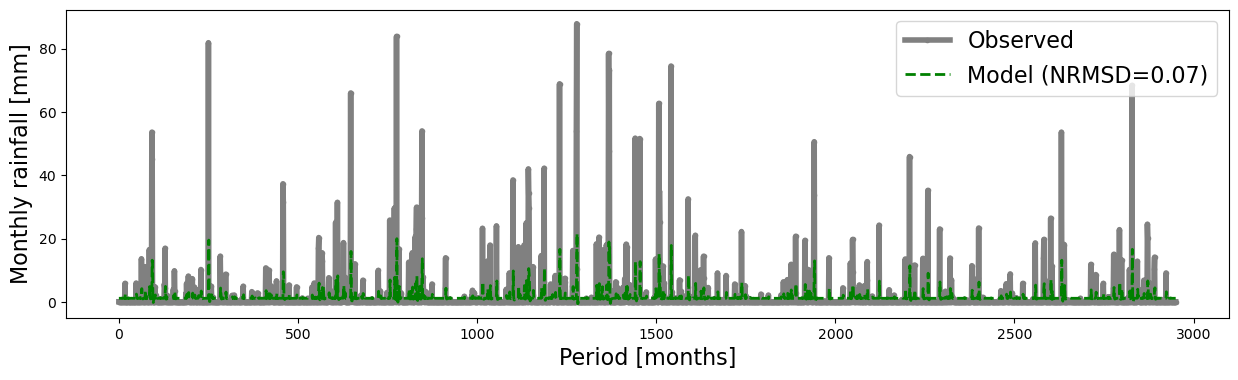

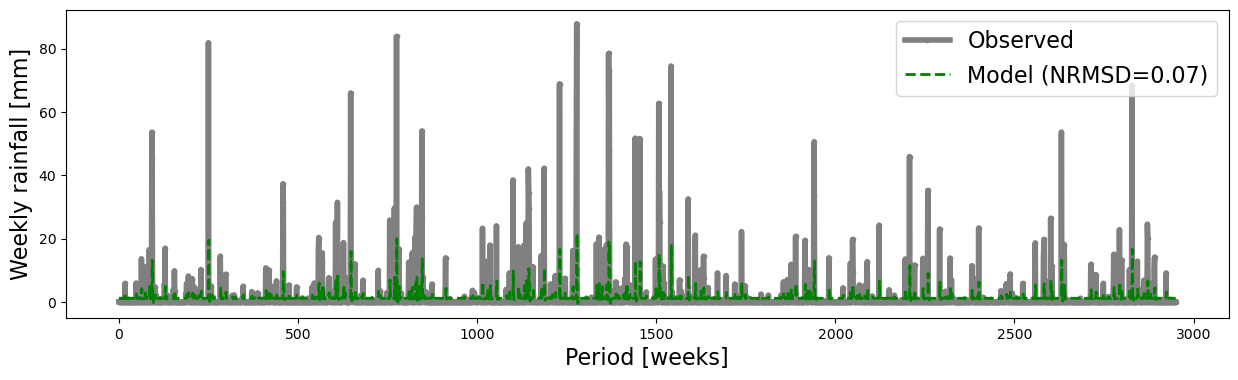

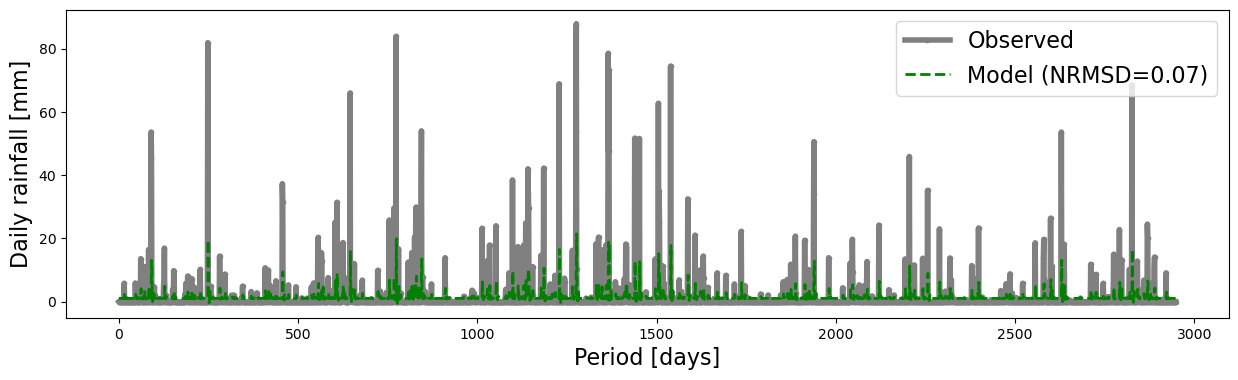

In [47]:
# 1) Monthly rainfall prediction
(y_monthly, y_pred_monthly, nrmsd_monthly) = perform_forecast(weather['rainfall'],
                                                              lags_monthly_rainfall)

plot_forecast(y_monthly, y_pred_monthly,
              xlabel="Period [months]",
              ylabel="Monthly rainfall [mm]",
              nrmsd=nrmsd_monthly)


# 2)Weekly rainfall prediction
(y_weekly_rainfall, y_pred_weekly_rainfall, nrmsd_weekly_rainfall) = perform_forecast(weather['rainfall'],
                                                                                     lags_weekly_rainfall)

plot_forecast(y_weekly_rainfall, y_pred_weekly_rainfall,
              xlabel="Period [weeks]",
              ylabel="Weekly rainfall [mm]",
              nrmsd=nrmsd_weekly_rainfall)


# 3)Daily rainfall prediction
(y_daily_rainfall, y_pred_daily_rainfall, nrmsd_daily_rainfall) = perform_forecast(weather['rainfall'],
                                                                                  lags_daily_rainfall)

plot_forecast(y_daily_rainfall, y_pred_daily_rainfall,
              xlabel="Period [days]",
              ylabel="Daily rainfall [mm]",
              nrmsd=nrmsd_daily_rainfall)


<font size="+1" color="red">Replace this cell with a brief commentary on what you observe when trying to predict rainfall.</font>

<font size="+1" color="blue">After trying with different lag values, I can say that is very hard to predict exacly the daily, weekly, and monthly precipitation doe to the big variance. There are periods where strong rains take place and the amount of water is very large, whereas  there are other years, on the same periods of time, where there's less precipitation. 
In conclusion, it's harder to predict the monthly, weekly, and daily precipitation with precision compared to the temperature.</font>

<font size="+2" color="#003300">I hereby declare that, except for the code provided by the course instructors, all of my code, report, and figures were produced by myself.</font>